# Дамошнє завдання №2
# Частина третя: Аналіз датасет c Kaggle.com

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Прочитати csv файл (використовується функція read_csv):

In [2]:
df = pd.read_csv("bestsellers with categories.csv")

## Вивести перші п'ять рядків (використовується функція head):

In [3]:
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


## Вивести розміри датасету (використовуйте атрибут shape):

In [4]:
df.shape

(550, 7)

### Про скільки книг зберігає дані датасет? Відповідь: 550

In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

## Вивести кількість пропусків (na) у кожному зі стовпців:

In [6]:
print("Missing values:\n", df.isnull().sum() / len(df))

Missing values:
 name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64


### Чи є в якихось змінних пропуски? Відповідь: Ні

## Перевірити, які є унікальні значення в колонці genre (використовуйте функцію unique):

In [7]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


### Які є унікальні жанри? Відповідь: Non Fiction та Fiction

## Подивитися на розподіл цін: побудувати діаграму (використовуючи kind='hist'):

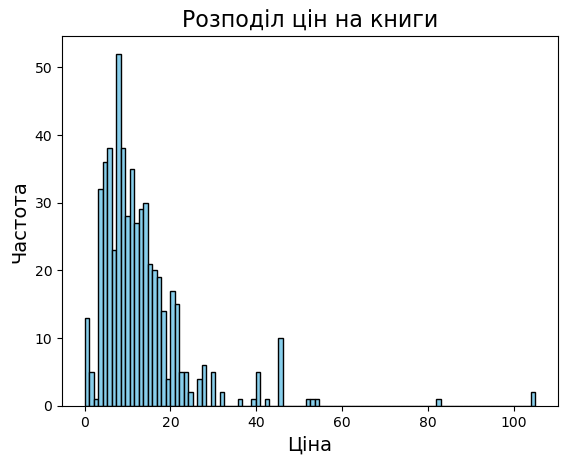

In [8]:
plt.hist(df['price'], bins=100, color='skyblue', edgecolor='black')

plt.title('Розподіл цін на книги', fontsize=16)
plt.xlabel('Ціна', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.show()

## Визначити, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median):

In [9]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна? Відповідь: {max_price}")
print(f"Мінімальна ціна? Відповідь: {min_price}")
print(f"Середня ціна? Відповідь: {mean_price}")
print(f"Медіанна ціна? Відповідь: {median_price}")

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


# Пошук та сортування даних

In [10]:
max_rating = df['user_rating'].max()
print(f"Який рейтинг у датасеті найвищий? Відповідь: {max_rating}")

num_books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Скільки книг мають такий рейтинг? Відповідь: {num_books_with_max_rating}")

max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print(f"Яка книга має найбільше відгуків? Відповідь: {max_reviews_book}")

top_50_2015_books = df[df['year'] == 2015]
most_expensive_book_2015 = top_50_2015_books[top_50_2015_books['price'] == top_50_2015_books['price'].max()]['name'].values[0]
print(f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: {most_expensive_book_2015}")

num_fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: {num_fiction_books_2010}")

num_books_with_rating_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: {num_books_with_rating_4_9}")

sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_in_sorted_list = sorted_books.tail(1)['name'].values[0]
print(f"Яка книга остання у відсортованому списку? Відповідь: {last_book_in_sorted_list}")


Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52
Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: Publication Manual of the American Psychological Association, 6th Edition
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1
Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


# Агрегування даних та з'єднання таблиць

## Максимальна та мінімальна ціни для кожного з жанрів:

In [11]:
grouped_data = df.groupby('genre')
aggregated_data = grouped_data.agg({'price': ['min', 'max']})

min_price_fiction = aggregated_data.loc['Fiction', ('price', 'min')]
max_price_fiction = aggregated_data.loc['Fiction', ('price', 'max')]
min_price_non_fiction = aggregated_data.loc['Non Fiction', ('price', 'min')]
max_price_non_fiction = aggregated_data.loc['Non Fiction', ('price', 'max')]

print(f"Мінімальна ціна для жанру Fiction: Відповідь: {min_price_fiction}")
print(f"Максимальна ціна для жанру Fiction: Відповідь: {max_price_fiction}")
print(f"Мінімальна ціна для жанру Non Fiction: Відповідь: {min_price_non_fiction}")
print(f"Максимальна ціна для жанру Non Fiction: Відповідь: {max_price_non_fiction}")

Мінімальна ціна для жанру Fiction: Відповідь: 0
Максимальна ціна для жанру Fiction: Відповідь: 82
Мінімальна ціна для жанру Non Fiction: Відповідь: 0
Максимальна ціна для жанру Non Fiction: Відповідь: 105


## Кількість книг для кожного з авторів:

In [12]:
author_book_counts = df.groupby('author').agg({'name': 'count'}).reset_index()
author_book_counts.columns = ['author', 'book_count']
number_row = author_book_counts.shape[0]
number_col = author_book_counts.shape[1]
author_max_books = author_book_counts[author_book_counts['book_count'] == author_book_counts['book_count'].max()]['author'].values[0]
max_books = author_book_counts['book_count'].max()
print(f"Якої розмірності вийшла таблиця? Відповідь: {number_row} рядків, {number_col} стовпці")
print(f"Який автор має найбільше книг? Відповідь: {author_max_books}")
print(f"Скільки книг цього автора? Відповідь: {max_books}")

Якої розмірності вийшла таблиця? Відповідь: 248 рядків, 2 стовпці
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


## Середній рейтинг для кожного автора

In [13]:
author_avg_rating = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
author_avg_rating.columns = ['author', 'avg_rating']

author_min_rating = author_avg_rating[author_avg_rating['avg_rating'] == author_avg_rating['avg_rating'].min()]['author'].values[0]
min_rating = author_avg_rating['avg_rating'].min()

print(f"У якого автора середній рейтинг мінімальний? Відповідь: {author_min_rating}")
print(f"Який у цього автора середній рейтинг? Відповідь: {min_rating}")

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


## Об'єднання двох фреймів:

In [14]:
merged_data = pd.concat([author_book_counts, author_avg_rating], axis=1)

sorted_data = merged_data.sort_values(by=['book_count', 'avg_rating'])
first_author = sorted_data.iloc[0]['author']

print(f"Який автор перший у списку? Відповідь: {first_author[0]}")

Який автор перший у списку? Відповідь: Muriel Barbery


# Візуалізація даних

## Гістограма розподілу рейтингів

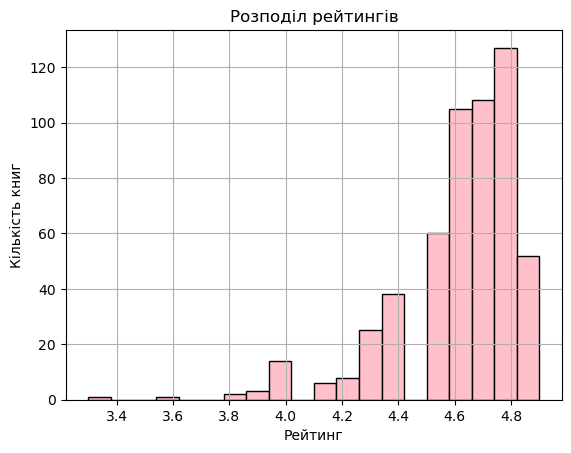

In [27]:
df['user_rating'].hist(bins=20, color='pink', edgecolor='black')
plt.title('Розподіл рейтингів')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість книг')
plt.show()

## Діаграма розсіювання між рейтингом та відгуками

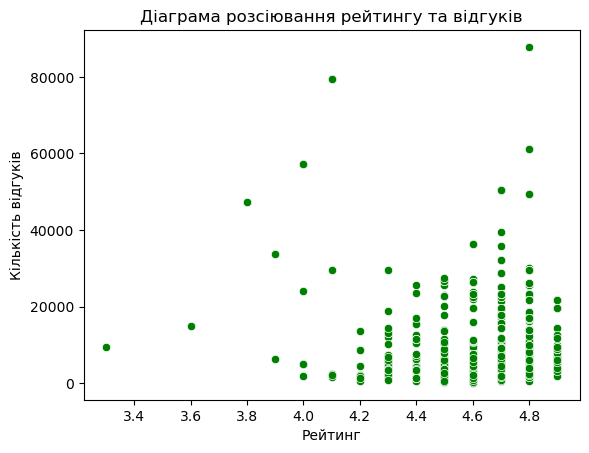

In [20]:
sns.scatterplot(x='user_rating', y='reviews', data=df, color='green')
plt.title('Діаграма розсіювання рейтингу та відгуків')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість відгуків')
plt.show()

## Діаграма середнього рейтингу за жанрами

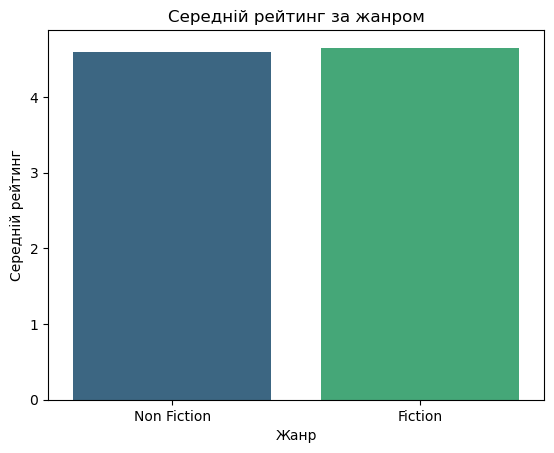

In [22]:
sns.barplot(x='genre', y='user_rating', data=df, errorbar=None, palette='viridis')
plt.title('Середній рейтинг за жанром')
plt.xlabel('Жанр')
plt.ylabel('Середній рейтинг')
plt.show()

## Кругова діаграма для розподілу жанрів

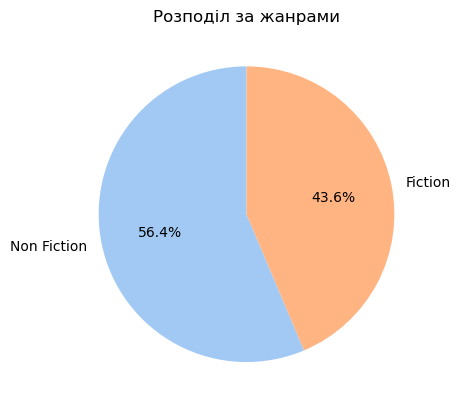

In [25]:
genre_counts = df['genre'].value_counts()
genre_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Розподіл за жанрами')
plt.ylabel('')
plt.show()

## Діаграма для відображення розподілу цін за жанром

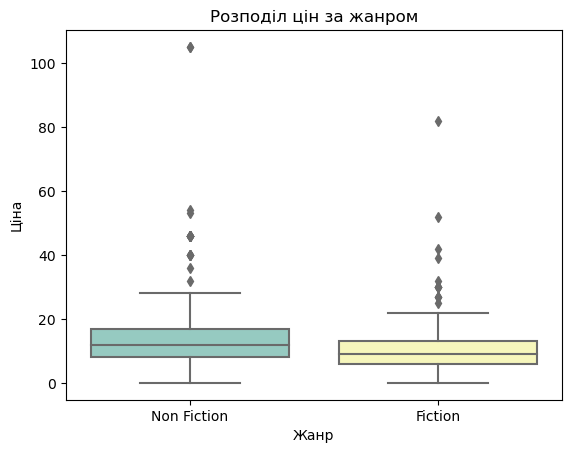

In [26]:
sns.boxplot(x='genre', y='price', data=df, palette='Set3')
plt.title('Розподіл цін за жанром')
plt.xlabel('Жанр')
plt.ylabel('Ціна')
plt.show()